
## Linear Regression Assumptions and Violations

This notebook covers the key assumptions in linear regression and what happens if each assumption is violated. By the end of this notebook, you will understand the four primary assumptions of linear regression, how to identify when they are met or violated, and what to do in each case.

### Learning Objectives
- Understand the four main assumptions of linear regression.
- Recognise the consequences of violating each assumption.
- Learn strategies for addressing violations.


## 1. Linearity Assumption

The linearity assumption means that the relationship between the independent (predictor) variables and the dependent (outcome) variable is linear.

### Example Plot
- **Satisfied**: Residuals vs. predicted values show no clear pattern, indicating a linear relationship.
- **Violated**: Residuals vs. predicted values show a curved pattern, indicating a non-linear relationship.

### Consequences of Violation
If this assumption is violated:
- The model may not accurately capture the relationship, leading to biased predictions and poor model fit.
- Residuals will display systematic patterns, not random noise.

### Solutions
- Consider transforming variables (e.g., log or square-root).
- Try adding polynomial terms or using a non-linear regression model.



## 2. Independence Assumption

This assumption implies that observations are independent of each other. For time-series data, this means no autocorrelation over time.

### Example Plot
- **Satisfied**: Residuals over time show no pattern, indicating independence.
- **Violated**: Residuals display a pattern over time, indicating autocorrelation.

### Consequences of Violation
If independence is violated:

- The standard errors become unreliable, affecting confidence intervals and hypothesis tests.
- The model may seem overly confident in predictions.

### Solutions
- For time-series data, use models like ARIMA or add lagged variables.
- For clustered data, consider mixed-effects models or generalized estimating equations (GEE).



## 3. Homoscedasticity Assumption

Homoscedasticity means that the variance of residuals is constant across all levels of the independent variables.

### Example Plot
- **Satisfied**: Residuals show a consistent spread across predicted values.
- **Violated**: Residuals display a "fan shape" or "cone shape," indicating heteroscedasticity.

### Consequences of Violation
If homoscedasticity is violated:

- Standard errors are biased, which affects confidence intervals and hypothesis tests.
- Interpretability of coefficients is impacted.

### Solutions
- Use weighted least squares (WLS) or robust standard errors.
- Transforming variables can sometimes help stabilize variance.



## 4. Normality of Errors Assumption

The residuals should be normally distributed, especially for reliable hypothesis testing.

### Example Plot
- **Satisfied**: Q-Q plot follows a 45-degree line, indicating normal distribution.
- **Violated**: Q-Q plot deviates significantly, indicating non-normal distribution.

### Consequences of Violation
If this assumption is violated:

- Confidence intervals and hypothesis tests may be unreliable.
- In severe cases, predictions can be biased.

### Solutions
- Transform the outcome variable if necessary.
- Use bootstrapping methods or switch to a non-parametric model.


## Example Plots

Below are visualisations to illustrate satisfied and violated cases for each assumption.

### Code
The following code visualises each assumption and its satisfied/violated states.

In [3]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

plt.style.use("seaborn-v0_8")

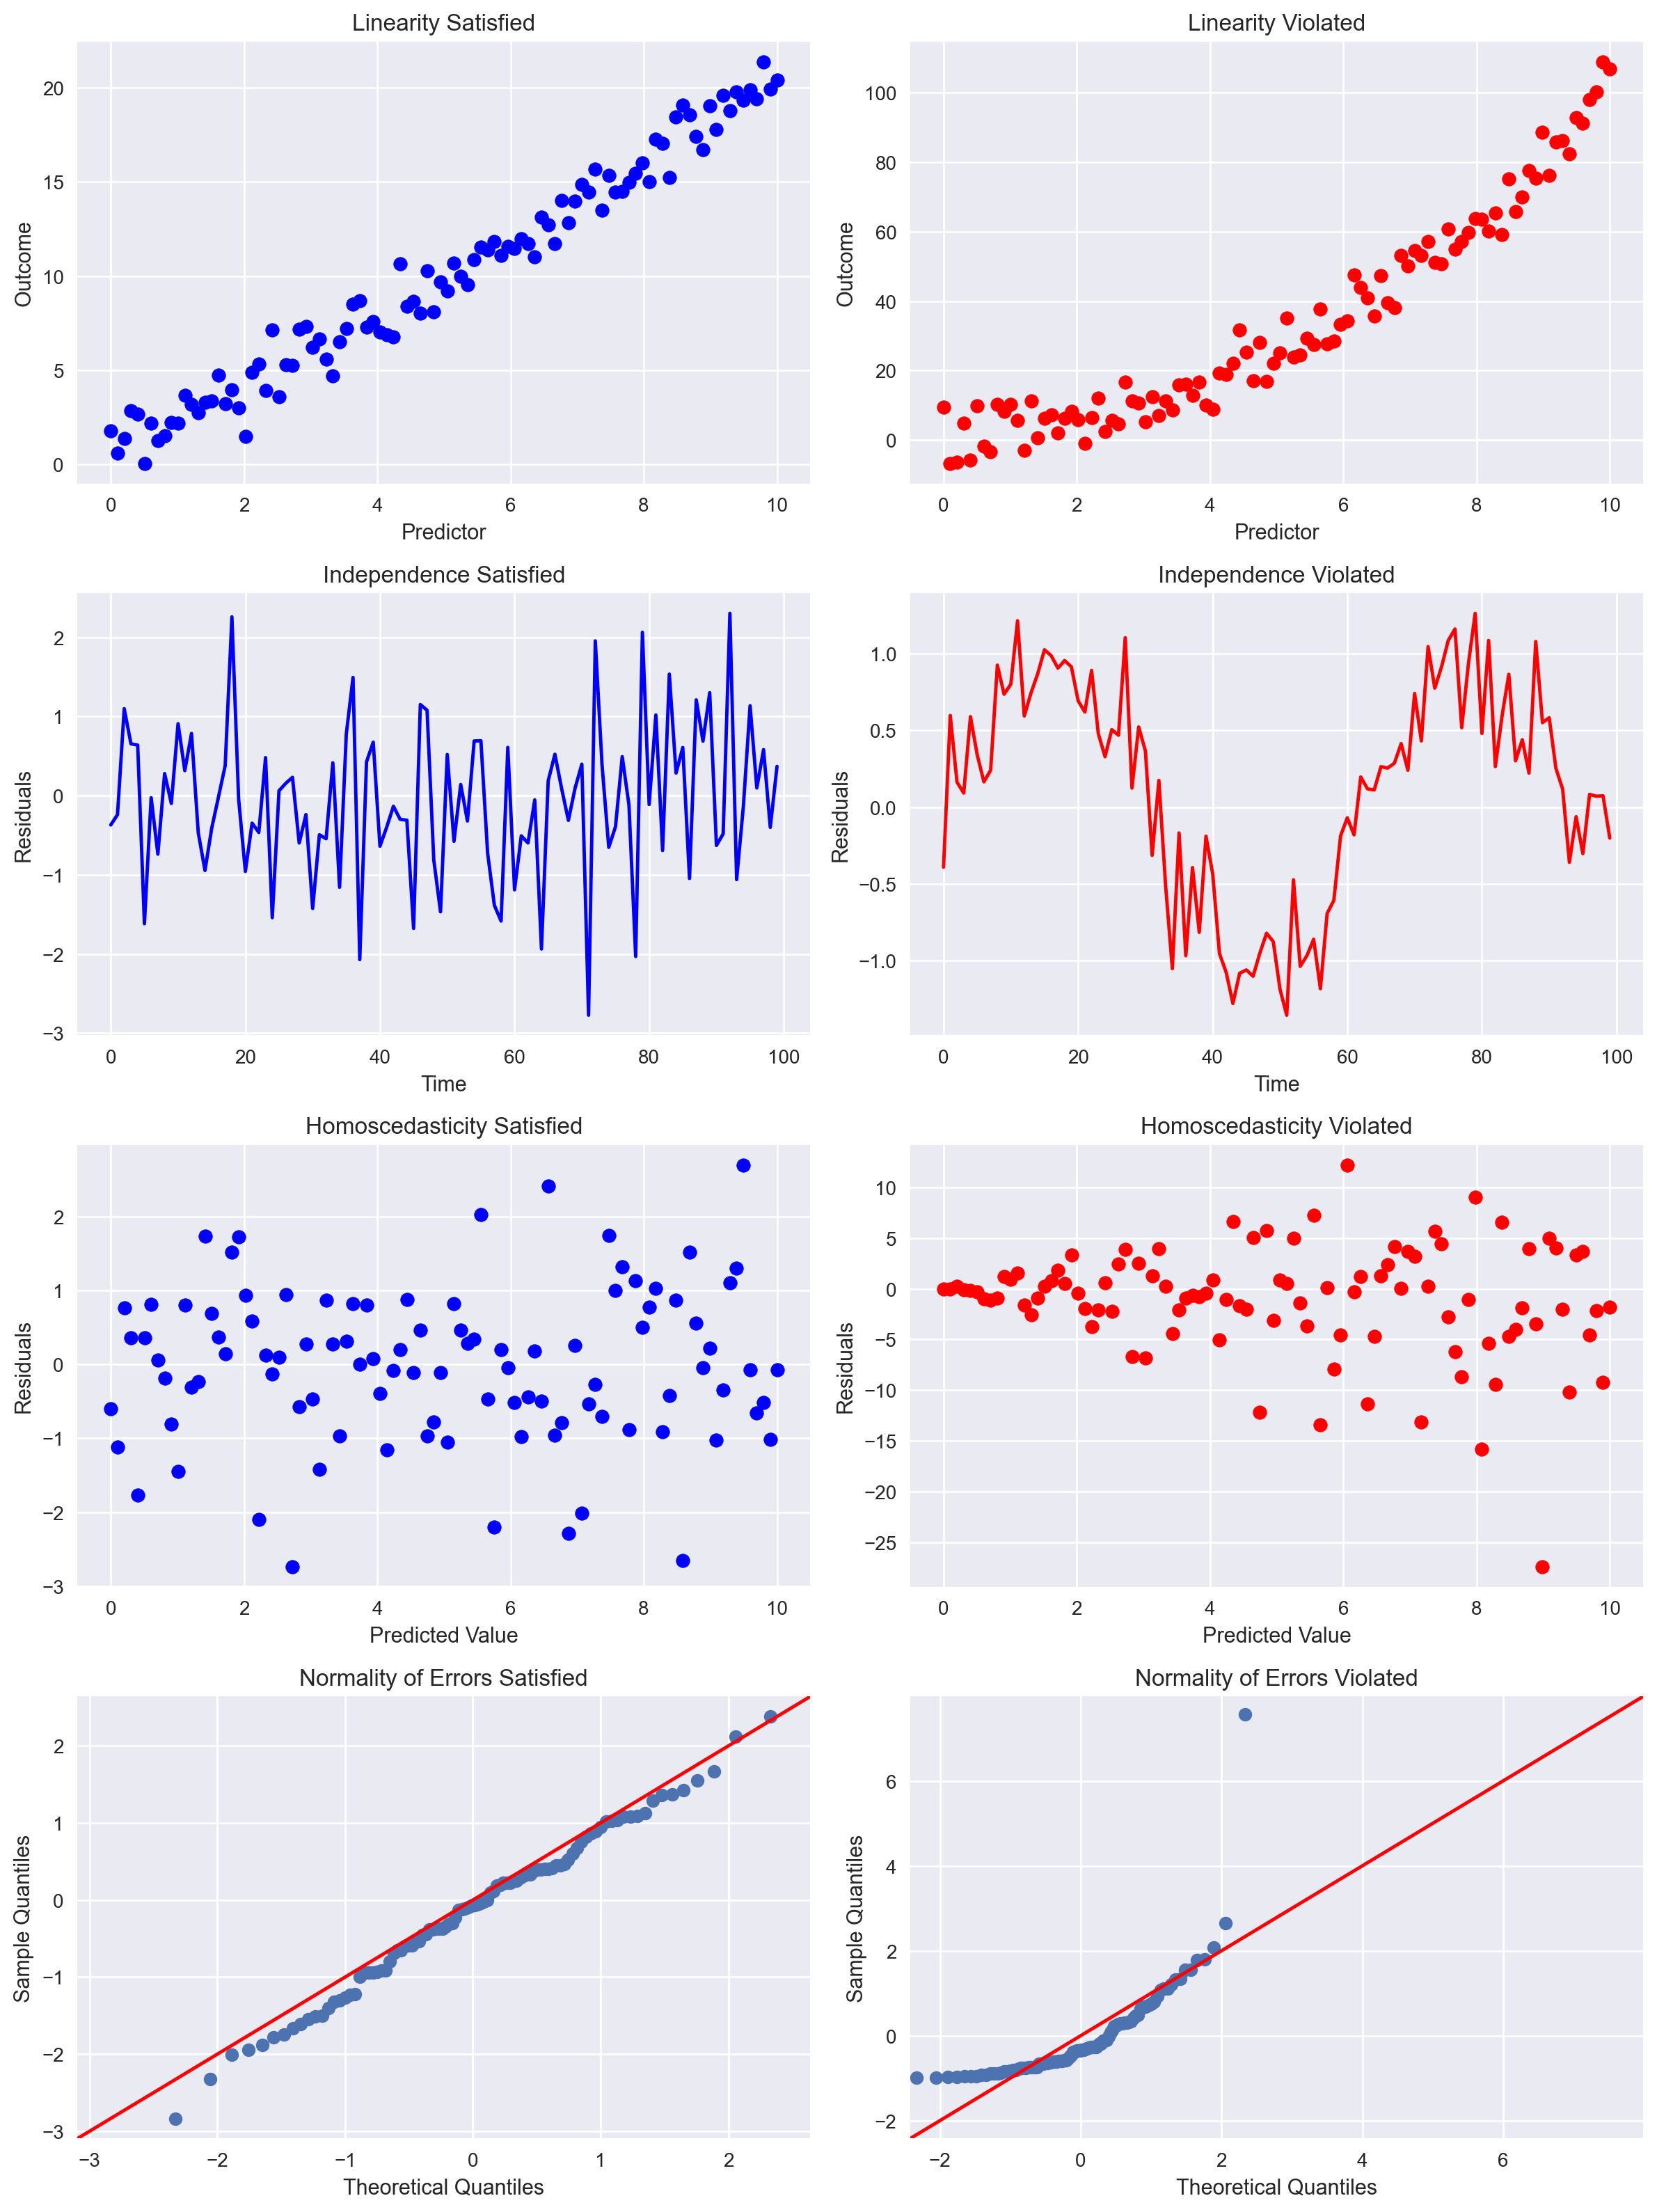

In [4]:
# Generate synthetic data for each plot scenario

# 1. Linearity
np.random.seed(0)
x = np.linspace(0, 10, 100)
y_linear = 2 * x + np.random.normal(0, 1, 100)  # Linear relationship
y_nonlinear = x**2 + np.random.normal(0, 5, 100)  # Non-linear relationship

# 2. Independence
time = np.arange(100)
y_independent = np.random.normal(0, 1, 100)  # No autocorrelation
y_autocorrelated = np.sin(time / 10) + np.random.normal(0, 0.3, 100)  # With autocorrelation

# 3. Homoscedasticity
y_homoscedastic = 2 * x + np.random.normal(0, 1, 100)  # Constant variance
y_heteroscedastic = 2 * x + (x * np.random.normal(0, 1, 100))  # Increasing variance

# 4. Normality of Errors
errors_normal = np.random.normal(0, 1, 100)
errors_non_normal = np.random.exponential(1, 100) - 1  # Skewed distribution

# Plot configurations
fig, axs = plt.subplots(4, 2, figsize=(12, 16))

# 1. Linearity
axs[0, 0].scatter(x, y_linear, color='b')
axs[0, 0].set_title("Linearity Satisfied")
axs[0, 0].set_xlabel("Predictor")
axs[0, 0].set_ylabel("Outcome")

axs[0, 1].scatter(x, y_nonlinear, color='r')
axs[0, 1].set_title("Linearity Violated")
axs[0, 1].set_xlabel("Predictor")
axs[0, 1].set_ylabel("Outcome")

# 2. Independence
axs[1, 0].plot(time, y_independent, color='b')
axs[1, 0].set_title("Independence Satisfied")
axs[1, 0].set_xlabel("Time")
axs[1, 0].set_ylabel("Residuals")

axs[1, 1].plot(time, y_autocorrelated, color='r')
axs[1, 1].set_title("Independence Violated")
axs[1, 1].set_xlabel("Time")
axs[1, 1].set_ylabel("Residuals")

# 3. Homoscedasticity
axs[2, 0].scatter(x, y_homoscedastic - (2 * x), color='b')
axs[2, 0].set_title("Homoscedasticity Satisfied")
axs[2, 0].set_xlabel("Predicted Value")
axs[2, 0].set_ylabel("Residuals")

axs[2, 1].scatter(x, y_heteroscedastic - (2 * x), color='r')
axs[2, 1].set_title("Homoscedasticity Violated")
axs[2, 1].set_xlabel("Predicted Value")
axs[2, 1].set_ylabel("Residuals")

# 4. Normality of Errors
sm.qqplot(errors_normal, line='45', ax=axs[3, 0])
axs[3, 0].set_title("Normality of Errors Satisfied")

sm.qqplot(errors_non_normal, line='45', ax=axs[3, 1])
axs[3, 1].set_title("Normality of Errors Violated")

plt.tight_layout()
plt.show()